# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**Douglas Francioni**

-I worked alone on this assignment.




# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**



In [1]:
#Compute Volume Ideal Gas

#Define Constants
R = 83.14 #cm^3bar/molK
T = 200 #C
T += 273.15 #K
P = 10 #bar

#Funcion for volume
def Vfunc(P,T):
    myV = R*T/P
    return myV

#Calculate V
V = Vfunc(P,T)

print(f'V = {V:0.1f} cm^3')
    

V = 3933.8 cm^3


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



In [2]:
#Compute Volume Ideal Gas
import numpy as np

#Define Constants
R = 83.14 #cm^3bar/molK
T = 200 #C
T += 273.15 #K
P = 10 #bar
B = -388 #cm^3/mol
C = -26000 #cm^6/mol^2

#Funcion for volume
def Vfunc(V,P,T):
    myV = ((P*V)/(R*T))-1-(B/V)-(C/V**2)
    return myV

#Array of volumes
V = np.linspace(1,10,10)

#Calculate V

Vf = Vfunc(V,P,T)

print(f'f(V) at V = 1cm^3 is {Vf[0]:0.1f}')
print(f'f(V) at V = 2cm^3 is {Vf[1]:0.1f}')
print(f'f(V) at a V range from 1 to 10cm^3 is {Vf}')

f(V) at V = 1cm^3 is 26387.0
f(V) at V = 2cm^3 is 6693.0
f(V) at a V range from 1 to 10cm^3 is [26387.00025421  6693.00050842  3017.22298485  1721.00101684
  1116.60127105   785.89041414   585.04259579   453.75203367
   363.10105331   297.80254209]


### Plot f(V) over a range where you can observe a zero



You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



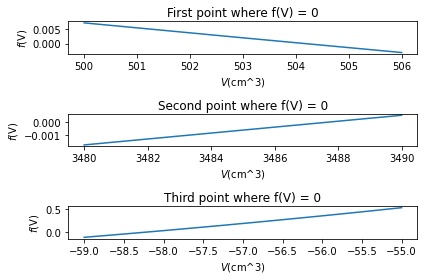

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Set range of V
Vrange1 = np.linspace(500,506,1000)
Vrange2 = np.linspace(3480,3490,110)
Vrange3 = np.linspace(-59,-55,10)

#Calculate f(V) at that range
Vf1 = Vfunc(Vrange1,P,T)
Vf2 = Vfunc(Vrange2,P,T)
Vf3 = Vfunc(Vrange3,P,T)

fig, (ax1, ax2, ax3) = plt.subplots(3,1)

#Plot f(V)
ax1.plot(Vrange1,Vf1)
ax1.set(xlabel = '$V$(cm^3)', ylabel = '$f$(V)')
ax1.set_title('First point where f(V) = 0', y=1.0, pad = 5)

ax2.plot(Vrange2,Vf2)
ax2.set(xlabel = '$V$(cm^3)', ylabel = '$f$(V)')
ax2.set_title('Second point where f(V) = 0', y=1.0, pad = 5)

ax3.plot(Vrange3,Vf3)
ax3.set(xlabel = '$V$(cm^3)', ylabel = '$f$(V)')
ax3.set_title('Third point where f(V) = 0', y=1.0, pad = 5)

fig.tight_layout()

plt.show()


State in words where the solution(s) are:

This function has two real solution where it is equal to zero. The first is at a volume of about 504cm^3 and the second is at a volume of about 3488cm^3.



### Express this in the form of a cubic polynomial in $V$



Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.



To do this, we multiply V^3 through the origional equation:

$f(V) = \frac{V^2PV}{RT} - V^2 - \frac{V^2B}{V} - \frac{V^2C}{V^2} = 0$

Simplifying that give us:

$f(V) = \frac{V^3P}{RT} - V^2 - VB - C = 0$

Mulitply by -1 to get:

$f(V) = \frac{-V^3P}{RT} + V^2 + VB + C = 0$

This gives us a cubic polynomial of the form $f(V) = a V^3 + b V^2 + c V + d = 0$, where $a = \frac{-P}{RT}$, $b = 1$, $c = B$, and $d = C$.

# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heat from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [4]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def odes(s,t):
    #constants
    sigma = 10
    B = 8/3
    p = 28
    
    #assign each ODE to a vector element
    x = s[0]
    y = s[1]
    z = s[2]
    
    #define each ODE
    dxdt = sigma*(y-x)
    dydt = p*x-y-x*z
    dzdt = -B*z+x*y
    
    return [dxdt,dydt,dzdt]

#initial conditions
s0 = [1,1,1]

#declare time vector
t = np.linspace(0,1000,10001)

#solve odes
#s will give large matrix of solved odes
s = odeint(odes,s0,t)

#separate the matrix for solutions of each ode
x = s[:,0]
y = s[:,1]
z = s[:,2]


2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [5]:
from scipy.integrate import odeint

def odes1(u,t):
    #constants
    sigma = 10
    B = 8/3
    p = 28
    
    #assign each ODE to a vector element
    x1 = u[0]
    y1 = u[1]
    z1 = u[2]
    
    #define each ODE
    dxdt1 = sigma*(y1-x1)
    dydt1 = p*x1-y1-x1*z1
    dzdt1 = -B*z1+x1*y1
    
    return [dxdt1,dydt1,dzdt1]

#initial conditions
u0 = [1,1,0.9999]

#declare time vector
t = np.linspace(0,1000,10001)
print(t)
#solve odes
#u will give large matrix of solved odes
u = odeint(odes1,u0,t)

#separate the matrix for solutions of each ode
x1 = u[:,0]
y1 = u[:,1]
z1 = u[:,2]

[0.000e+00 1.000e-01 2.000e-01 ... 9.998e+02 9.999e+02 1.000e+03]


3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

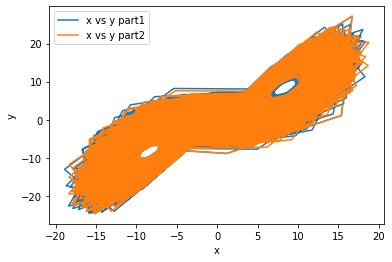

In [6]:
#plot of x vs y
plt.plot(x,y, label='x vs y part1')
plt.plot(x1,y1,label='x vs y part2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();
plt.show()

4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

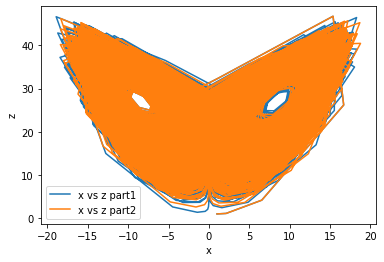

In [7]:
#plot of x vs z
plt.plot(x,z, label='x vs z part1')
plt.plot(x1,z1,label='x vs z part2')
plt.xlabel('x')
plt.ylabel('z')
plt.legend();
plt.show()

5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

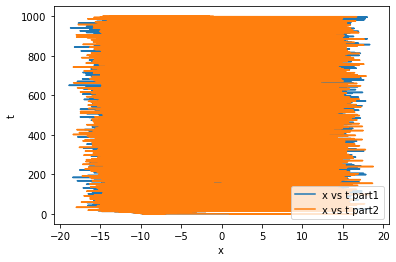

In [8]:
#plot of x vs t
plt.plot(x,t, label='x vs t part1')
plt.plot(x1,t,label='x vs t part2')
plt.xlabel('x')
plt.ylabel('t')
plt.legend();
plt.show()

6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

Changing z by 0.01% had a large effect on the outcome as can be seen by the change in shape and min/max between the first and second plot.

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [9]:
import numpy as np

# read florida.csv
dat = np.genfromtxt("florida.csv", delimiter=",", skip_header=1)

Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

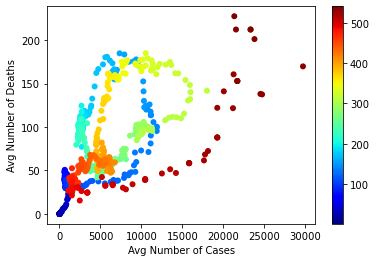

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = []
y = []
z = []

#add data to seperate x and y arrays
for row in dat:
    x.append(row[1])
    y.append(row[2])
    z.append(row[0])
    
#use panda to plot data against a colormap
df=pd.DataFrame(data={'A':x,'B':y,'C':z})
points = plt.scatter(df.A, df.B, c=df.C,cmap="jet", lw=0)
plt.colorbar(points)

#label plot
plt.xlabel('Avg Number of Cases')
plt.ylabel('Avg Number of Deaths');

plt.show()

**Put Commentary here:** Over time it seems that there is a constant cycle with the pattern of cases and deaths increasing and then subsiquently decreasing an more people have been exposed to the virus. Over time the average number of cases is continuously increasing on average for each cycle. The average number of death caps at just under 200 earlier on, but recently we are seeing some higher number above 200.

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Write a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

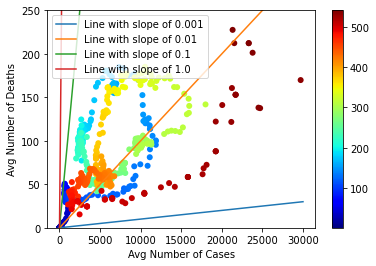

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#readding this in so I dont have to run all cells to troubleshoot
x = []
y = []
z = []

#add data to seperate x and y arrays
for row in dat:
    x.append(row[1])
    y.append(row[2])
    z.append(row[0])
    
#use panda to plot data against a colormap
df=pd.DataFrame(data={'A':x,'B':y,'C':z})
points = plt.scatter(df.A, df.B, c=df.C,cmap="jet", lw=0)
plt.colorbar(points)

#label plot
plt.xlabel('Avg Number of Cases')
plt.ylabel('Avg Number of Deaths');

x = np.linspace(0,30000,30000)

i = 0.001
while (i < 1.1):
    y=i*x
    plt.plot(x,y, label='Line with slope of {}'.format(i))
    i *= 10

plt.ylim([0,250])
plt.legend()
plt.show()
    

Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

The line with a slope of 0.01 best fits the data. Best fit means the distance between data points is at a minimum for a given line. This allows you to estimate future values by following the line.

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here: https://github.com/dfrancioni/Che_Math


**Upload your jupyter notebook to Canvas for grading. Thank you!